In [3]:
from schemes import * 
from SBTS import *
from metrics import * 
from tools import *

Suppose that the process
$X = (X^{(1)}, X^{(2)})$ is the solution of the following system of stochastic differential equations:
\begin{align*}
dX_t^{(1)} &= r X_t^{(1)}, dt + \sigma_1 X_t^{(1)}, dW_t^{(1)},\\
dX_t^{(2)} &= r X_t^{(2)}, dt + \sigma_2 X_t^{(2)}, dW_t^{(2)}, \\
d\langle W^{(1)}, W^{(2)} \rangle_t &= \rho, dt,
\end{align*}
where $\sigma_1, \sigma_2 > 0$ denote the volatilities associated with assets $X^{(1)}$ and $X^{(2)}$, respectively, and $\rho \in [-1,1]$ is the correlation between the Brownian motions. We further assume that
$X_0^{(1)} = X_0^{(2)} = 1$.

As a consequence,
$$Y_t :=
\begin{pmatrix}
\ln\!\left(\frac{X_{t+\Delta}^{(1)}}{X_t^{(1)}}\right) \\
\ln\!\left(\frac{X_{t+\Delta}^{(2)}}{X_t^{(2)}}\right)
\end{pmatrix}
\sim \mathcal{N}(\mu_t, \Sigma_t), \qquad \mu_t :=
\begin{pmatrix}
\left(r - \frac{\sigma_1^2}{2}\right)\Delta \\
\left(r - \frac{\sigma_2^2}{2}\right)\Delta
\end{pmatrix},
\qquad
\Sigma_t :=
\begin{pmatrix}
\sigma_1^2 \Delta & \rho \sigma_1 \sigma_2 \Delta \\
\rho \sigma_1 \sigma_2 \Delta & \sigma_2^2 \Delta
\end{pmatrix}.$$

The log-likelihood associated with a trajectory
$(X_{t_i}^{(1,m)}, X_{t_i}^{(2,m)})_{i=0,\ldots,N}$ is then given by
\begin{align*}
    \ell(\sigma_1, \sigma_2, r, \rho, X^{(1,m)}, X^{(2, m)}) =  -\frac12 \sum_{i=0}^{N-1}\left\{\ln\big(4\pi^2\det(\Sigma_{t_i}^{(m)})\big) + \big(Z_{t_i}^{(m)}\big)^\top \big(\Sigma_{t_i}^{(m)}\big)^{-1}Z_{t_i}^{(m)}\right\},
\end{align*}
where $Z_{t_i}^{(m)} := Y_{t_i}^{(m)} - \mu_{t_i}^{(m)}$.

Note that
\begin{align*}
\det(\Sigma_{t_i}^{(m)}) &= \Delta^2 \sigma_1^2 \sigma_2^2 (1 - \rho^2), \qquad \big(\Sigma_{t_i}^{(m)}\big)^{-1}= \frac{1}{\Delta \sigma_1^2 \sigma_2^2 (1 - \rho^2)}
\begin{pmatrix}
\sigma_2^2 & -\rho \sigma_1 \sigma_2 \\
-\rho \sigma_1 \sigma_2 & \sigma_1^2
\end{pmatrix},
\end{align*}
and 
\begin{align*}
    \det(\Sigma_{t_i}^{(m)}) = \Delta^2 \sigma_1^2\sigma_2^2(1&-\rho^2), \quad \big(\Sigma_{t_i}^{(m)}\big)^{-1} = \frac{1}{\Delta \sigma_1^2\sigma_2^2(1-\rho^2)}\begin{pmatrix}
       \sigma_2^2 & -\rho\sigma_1\sigma_2\\
       -\rho\sigma_1\sigma_2 & \sigma_1^2 
    \end{pmatrix}\\
    \big(Z_{t_i}^{(m)}\big)^\top \big(\Sigma_{t_i}^{(m)}\big)^{-1}Z_{t_i}^{(m)} &=\frac{1}{\Delta \sigma_1^2\sigma_2^2(1-\rho^2)}\Bigg\{\sigma_2^2\left(\ln\left(\frac{X_{t_{i+1}}^{(1,m)}}{X_{t_i}^{(1,m)}}\right) - \left(r-\frac{\sigma_1^2}{2}\right)\Delta\right)^2\\
    &\!\!\!\!\!\!-2\rho\sigma_1\sigma_2 \left(\ln\left(\frac{X_{t_{i+1}}^{(1,m)}}{X_{t_i}^{(1,m)}}\right) - \left(r-\frac{\sigma_1^2}{2}\right)\Delta\right)\left(\ln\left(\frac{X_{t_{i+1}}^{(2,m)}}{X_{t_i}^{(2,m)}}\right) - \left(r-\frac{\sigma_2^2}{2}\right)\Delta\right)\\
    &\!\!\!\!\!\!+\sigma_1^2\left(\ln\left(\frac{X_{t_{i+1}}^{(2,m)}}{X_{t_i}^{(2,m)}}\right) - \left(r-\frac{\sigma_2^2}{2}\right)\Delta\right)^2\Bigg\}
\end{align*}

We take $M = 1000$ reference trajectories, $N = 252$, a time horizon $T = 1$, and thus a time step $\Delta = 1/252$.
For the generation of synthetic trajectories, the Euler scheme is used with an internal discretization $N_\pi = 100$, and the selected hyperparameters are $(h, r) = ([0.1, 0.1], 10)$.

As in the Ornstein–Uhlenbeck case (see `test_OU.ipynb`), we empirically observe the same behavior with respect to the parameter $r$, despite the Markovian nature of the process. To preserve the analogy with the previous setting, we again work with log-returns:
\begin{align*}
(\widetilde{X}_{t_0}^{(1,m)}, \widetilde{X}_{t_1}^{(1,m)}, \ldots, \widetilde{X}_{t_N}^{(1,m)})
&=
\left(
0,
\ln\left(\frac{X_{t_1}^{(1,m)}}{X_{t_0}^{(1,m)}}\right),
\ldots,
\ln\left(\frac{X_{t_N}^{(1,m)}}{X_{t_{N-1}}^{(1,m)}}\right)
\right),\\
(\widetilde{X}_{t_0}^{(2,m)}, \widetilde{X}_{t_1}^{(2,m)}, \ldots, \widetilde{X}_{t_N}^{(2,m)})
&=
\left(
0,
\ln\left(\frac{X_{t_1}^{(2,m)}}{X_{t_0}^{(2,m)}}\right),
\ldots,
\ln\left(\frac{X_{t_N}^{(2,m)}}{X_{t_{N-1}}^{(2,m)}}\right)
\right).
\end{align*}

### I. Fixed parameters 

#### I.1. Generation of synthetic trajectories 

In [7]:
sigma1 = 0.3
sigma2 = 0.2 
sigma = [sigma1, sigma2]
rho = -0.3
rho_matrix = [[1, rho], [rho, 1]]
Sigma_matrix = build_Sigma(sigma, rho_matrix)

In [9]:
M = 1000
N = 252
Z = np.random.normal(0.0, 1.0, size=(M, N, 2))
T = N/252
delta = T/N
W = build_W(Z, T)
C = np.linalg.cholesky(Sigma_matrix)
r = 0.05
S0 = [1, 1]
X = simulate_black_scholes(S0, T, r, C, W)

In [11]:
log_returns_1 = np.zeros((M,N+1))
log_returns_1[:, 1:] = np.diff(np.log(X[:, :, 0]), axis = 1)
std_1 = log_returns_1[:, 1:].std(ddof=1)
log_returns_1 = log_returns_1  * np.sqrt(delta) / std_1

log_returns_2 = np.zeros((M,N+1))
log_returns_2[:, 1:] = np.diff(np.log(X[:, :, 1]), axis = 1)
std_2 = log_returns_2[:, 1:].std(ddof=1)
log_returns_2 = log_returns_2  * np.sqrt(delta) / std_2

In [13]:
true_vals = np.stack((log_returns_1, log_returns_2), axis=-1)

In [15]:
r1 = log_returns_1[:, 1:].ravel()
r2 = log_returns_2[:, 1:].ravel()
corr_global = np.corrcoef(r1, r2)[0, 1]
print("Corrélation globale ~ rho ?: ", corr_global)

Corrélation globale ~ rho ?:  -0.29907956046756917


In [23]:
N_pi = 100
h = np.array([0.1, 0.1])
n = 1000
vals = simulate_SBTS_trajectories_d(true_vals, n, h, delta, N_pi, x0 = np.zeros(2), markov_proj=True, r=10)

100%|███████████████████████████████████████| 1000/1000 [29:00<00:00,  1.74s/it]


In [40]:
vals[:, :, 0] *= std_1 / np.sqrt(delta)
vals[:, :, 1] *= std_2 / np.sqrt(delta)
vals[:, :, 0] = np.exp(vals[:, :, 0].cumsum(axis = 1))
vals[:, :, 1] = np.exp(vals[:, :, 1].cumsum(axis = 1))

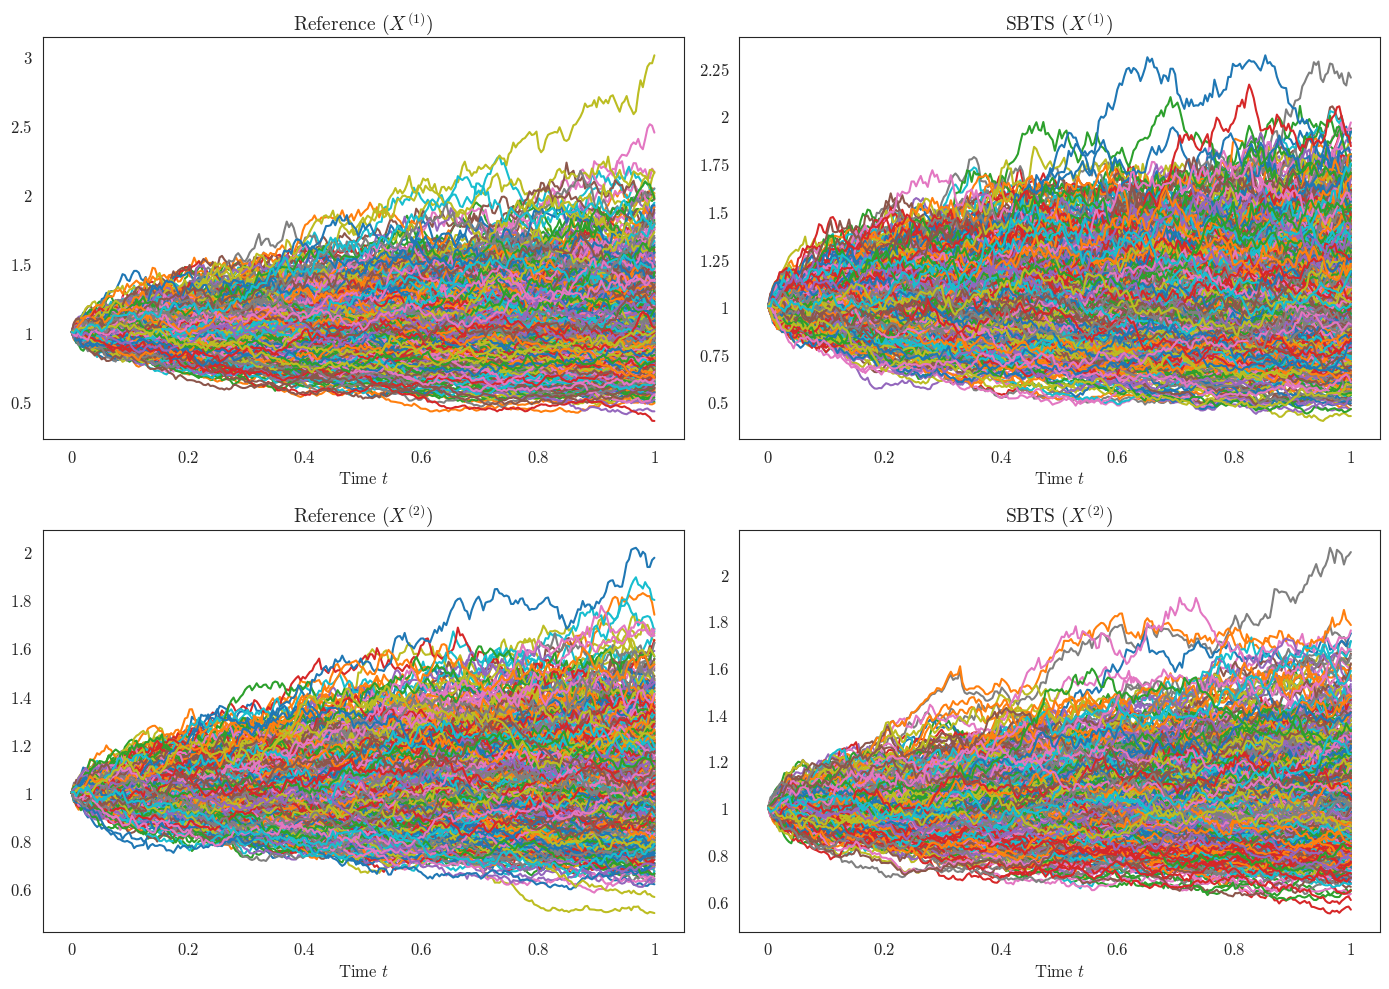

In [95]:
plot_traj_BS(X[250:], vals[250:], T, N, samelim=False)

#### I.2. Parameters estimation

In [98]:
bounds = np.array([
    (0.01, 1.0),     # sigma1
    (0.01, 1.0),     # sigma2
    (-4, 4),         # r 
    (-0.95, 0.95)    # rho 
])

In [100]:
params_opt, info = predict_params_BS(X[:, :, 0], X[:, :, 1], delta, bounds)
params_opt = np.array(params_opt)
params_opt_SBTS, info_SBTS = predict_params_BS(vals[:, :, 0], vals[:, :, 1], delta, bounds)
params_opt_SBTS = np.array(params_opt_SBTS)

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 397.82it/s]


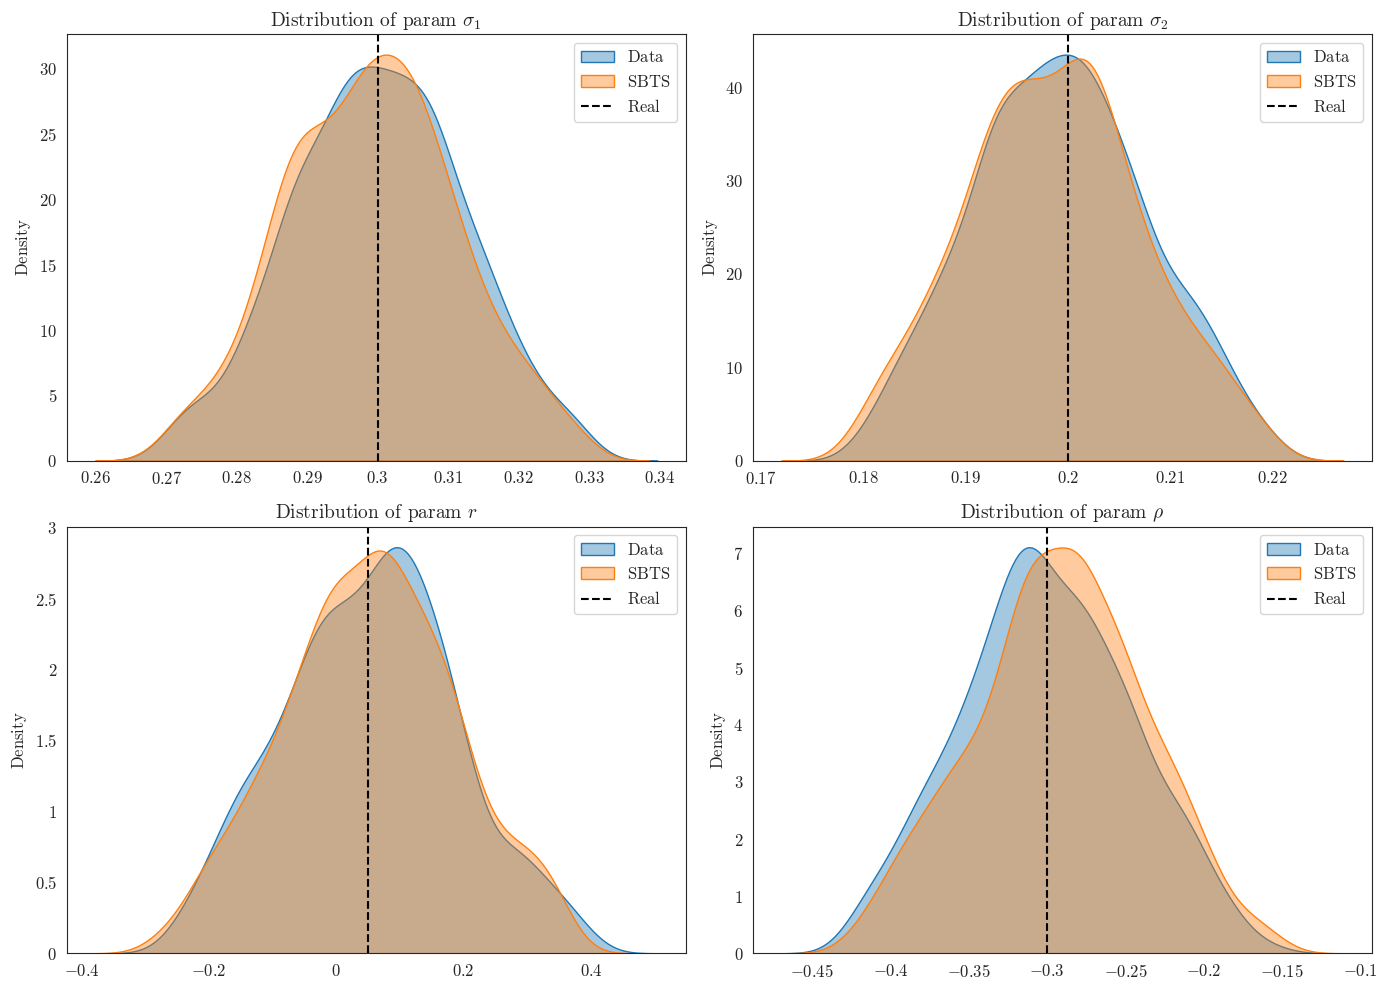

In [105]:
plot_distrib_BS(sigma1, sigma2, r, rho, params_opt, params_opt_SBTS)

#### I.3. Discriminative score

In [65]:
discriminative_scores, predictive_scores = scores(X, vals, col_pred = None, 
                                                  iterations = 2000, n_temp = 10, min_max = True, both = True)

100%|██████████████████████████████████████████| 10/10 [38:13<00:00, 229.30s/it]

Discriminative score : 0.03 +- 0.012
Predictive score : 0.307 +- 0.003


In [69]:
predictive_scores

array([0.30688663, 0.30703432, 0.3056829 , 0.29877971, 0.30690163,
       0.30725528, 0.31128258, 0.30629998, 0.30808287, 0.31102441])

### II. Random parameters

#### II.1. Generation of synthetic trajectories 

In [110]:
M = 1000
N = 252 
T = N/252
delta = T/N 
S0 = [1, 1]

sigma_1_random = np.random.uniform(0.1, 0.3, M) 
sigma_2_random = np.random.uniform(0.1, 0.3, M)  
rho_random = np.random.uniform(-0.7, 0.7, M) 
r_random = np.random.uniform(0.01, 0.3, M) 

X_random = np.zeros((M, N+1, 2))

for m in range(M) : 
    rho_matrix_random = [[1, rho_random[m]], [rho_random[m], 1]]
    Sigma_matrix_random = build_Sigma([sigma_1_random[m], sigma_2_random[m]], rho_matrix_random)
    Z_random = np.random.normal(0.0, 1.0, size=(1, N, 2))
    W_random = build_W(Z_random, T)
    C_random = np.linalg.cholesky(Sigma_matrix_random)
    X_random[m, :, :] = simulate_black_scholes(S0, T, r_random[m], C_random, W_random)

In [112]:
log_returns_1_random = np.zeros((M,N+1))
log_returns_1_random[:, 1:] = np.diff(np.log(X_random[:, :, 0]), axis = 1)
std_1_random = log_returns_1_random[:, 1:].std(ddof=1)
log_returns_1_random = log_returns_1_random  * np.sqrt(delta) / std_1_random

log_returns_2_random = np.zeros((M,N+1))
log_returns_2_random[:, 1:] = np.diff(np.log(X_random[:, :, 1]), axis = 1)
std_2_random = log_returns_2_random[:, 1:].std(ddof=1)
log_returns_2_random = log_returns_2_random  * np.sqrt(delta) / std_2_random

In [114]:
true_vals_random = np.stack((log_returns_1_random, log_returns_2_random), axis=-1)

In [124]:
N_pi = 100
h = np.array([0.1, 0.1])
n = 1000
vals_random = simulate_SBTS_trajectories_d(true_vals_random, n, h, delta, N_pi, x0 = np.zeros(2), markov_proj=True, r=10)

100%|███████████████████████████████████████| 1000/1000 [29:28<00:00,  1.77s/it]


In [133]:
vals_random[:, :, 0] *= std_1_random / np.sqrt(delta)
vals_random[:, :, 1] *= std_2_random / np.sqrt(delta)
vals_random[:, :, 0] = np.exp(vals_random[:, :, 0].cumsum(axis = 1))
vals_random[:, :, 1] = np.exp(vals_random[:, :, 1].cumsum(axis = 1))

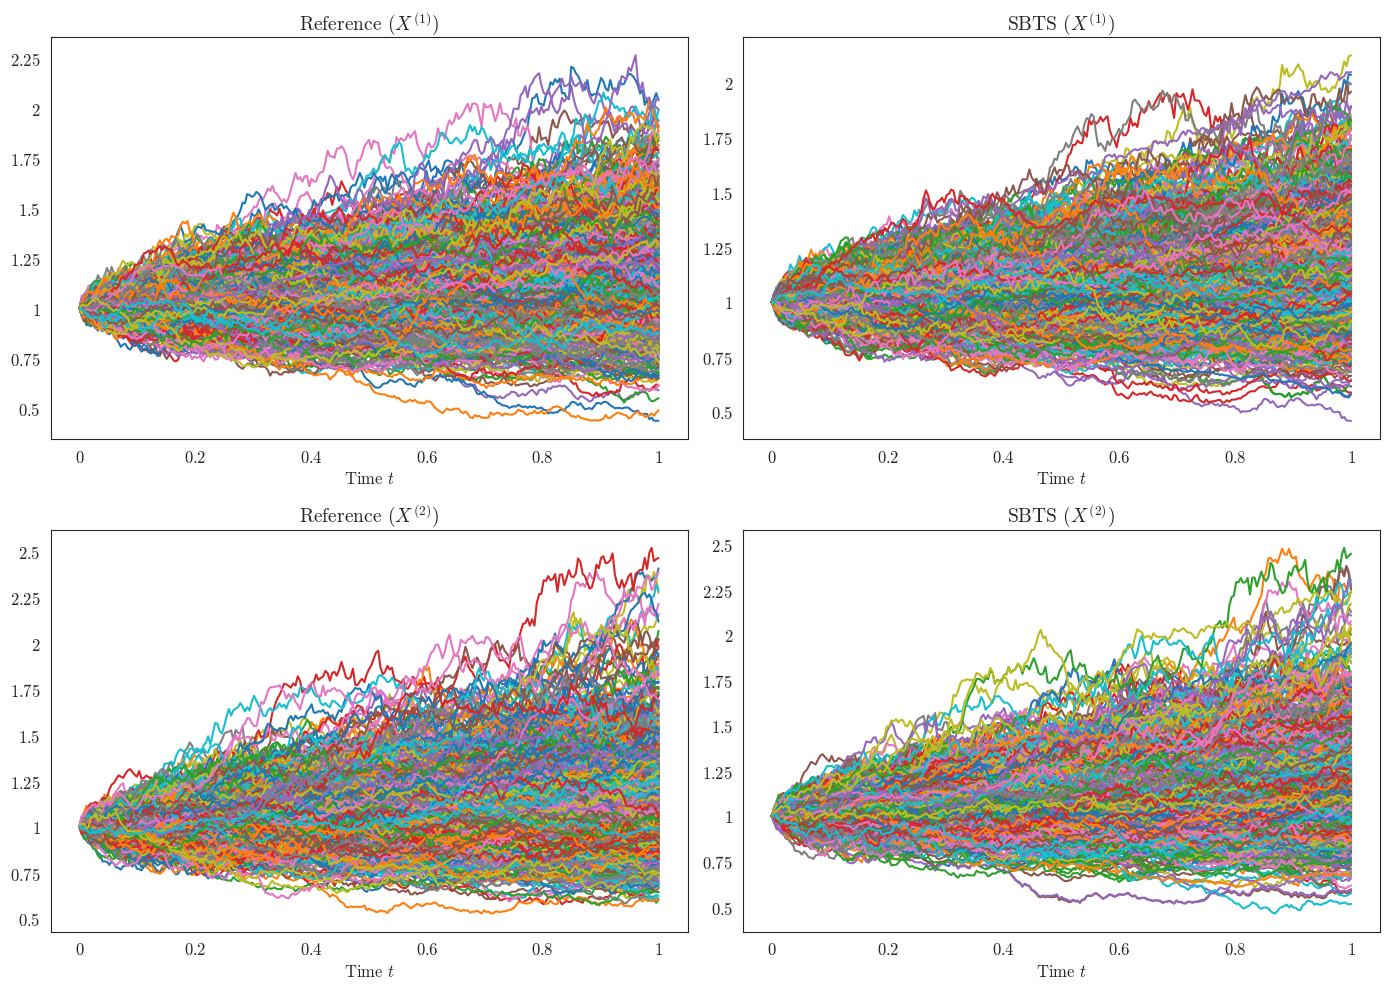

In [144]:
plot_traj_BS(X_random, vals_random, T, N, samelim=False)

#### II.2. Parameters estimation

In [138]:
params_opt_random, _ = predict_params_BS(X_random[:, :, 0], X_random[:, :, 1], delta, bounds)
params_opt_random = np.array(params_opt_random)

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 294.75it/s]


In [139]:
params_opt_SBTS_random, _ = predict_params_BS(vals_random[:, :, 0], vals_random[:, :, 1], delta, bounds)
params_opt_SBTS_random = np.array(params_opt_SBTS_random)

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 302.76it/s]


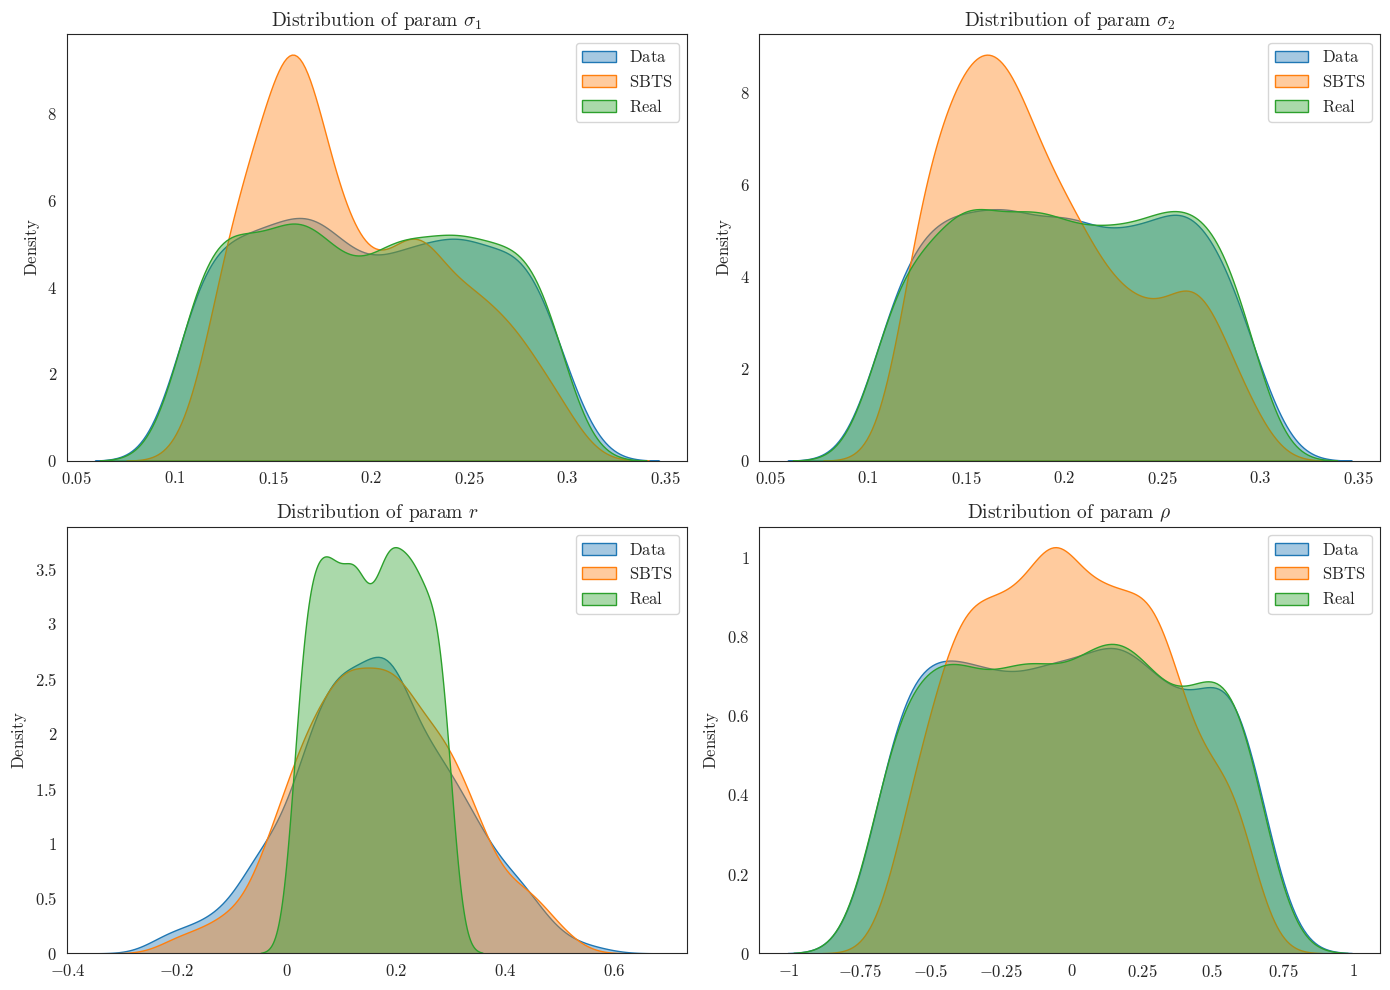

In [142]:
plot_distrib_BS_random(sigma_1_random, sigma_2_random, r_random, rho_random, params_opt_random, params_opt_SBTS_random)

#### II.3. Discriminative score

In [91]:
discriminative_scores_random, predictive_scores_random = scores(X_random, vals_random, col_pred = None, 
                                                      iterations = 2000, n_temp = 10, min_max = True, both = True)

100%|██████████████████████████████████████████| 10/10 [38:59<00:00, 233.92s/it]

Discriminative score : 0.027 +- 0.013
Predictive score : 0.21 +- 0.009
